# **Task 1: Load and Inspect the Mesh** 

In [51]:
!pip install trimesh 

In [52]:
# Tasks 1
# Dataset: /kaggle/input/mixar-dataset/8samples

import numpy as np
import trimesh
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

INPUT_DIR = "/kaggle/input/mixar-dataset/8samples"
OUTPUT_DIR = "/kaggle/working/output"
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("Reading data from:", INPUT_DIR)
print("Saving outputs to:", OUTPUT_DIR)


Reading data from: /kaggle/input/mixar-dataset/8samples
Saving outputs to: /kaggle/working/output


In [53]:
obj_files = glob.glob(os.path.join(INPUT_DIR, "*.obj"))
print("Found OBJ files:", obj_files)

task1_stats = {
    "file": [],
    "num_vertices": [],
    "min_x": [], "min_y": [], "min_z": [],
    "max_x": [], "max_y": [], "max_z": [],
    "mean_x": [], "mean_y": [], "mean_z": [],
    "std_x": [], "std_y": [], "std_z": [],
}

meshes = {}

for path in obj_files:
    mesh = trimesh.load(path, process=False)
    V = np.asarray(mesh.vertices)

    meshes[path] = (mesh, V)
    name = os.path.basename(path)

    vmin = V.min(axis=0)
    vmax = V.max(axis=0)
    mean = V.mean(axis=0)
    std = V.std(axis=0)

    task1_stats["file"].append(name)
    task1_stats["num_vertices"].append(len(V))

    task1_stats["min_x"].append(vmin[0])
    task1_stats["min_y"].append(vmin[1])
    task1_stats["min_z"].append(vmin[2])

    task1_stats["max_x"].append(vmax[0])
    task1_stats["max_y"].append(vmax[1])
    task1_stats["max_z"].append(vmax[2])

    task1_stats["mean_x"].append(mean[0])
    task1_stats["mean_y"].append(mean[1])
    task1_stats["mean_z"].append(mean[2])

    task1_stats["std_x"].append(std[0])
    task1_stats["std_y"].append(std[1])
    task1_stats["std_z"].append(std[2])

    print(f"\n-{name} ")
    print("Vertices:", len(V))
    print("Min:", vmin)
    print("Max:", vmax)
    print("Mean:", mean)
    print("Std:", std)


df_stats = pd.DataFrame(task1_stats)
df_stats.to_csv(f"{OUTPUT_DIR}/task1_stats.csv", index=False)
print("\nSaved: task1_stats.csv")
df_stats


Found OBJ files: ['/kaggle/input/mixar-dataset/8samples/table.obj', '/kaggle/input/mixar-dataset/8samples/person.obj', '/kaggle/input/mixar-dataset/8samples/fence.obj', '/kaggle/input/mixar-dataset/8samples/girl.obj', '/kaggle/input/mixar-dataset/8samples/talwar.obj', '/kaggle/input/mixar-dataset/8samples/cylinder.obj', '/kaggle/input/mixar-dataset/8samples/branch.obj', '/kaggle/input/mixar-dataset/8samples/explosive.obj']

-table.obj 
Vertices: 3148
Min: [-0.208906 -0.       -0.5     ]
Max: [0.208906 0.611761 0.5     ]
Mean: [-0.01319047  0.38637404 -0.0035868 ]
Std: [0.1531193  0.19192155 0.34605152]

-person.obj 
Vertices: 3106
Min: [-0.84375   0.       -0.212891]
Max: [0.841797 1.900391 0.210938]
Mean: [ 0.00500294  1.15924209 -0.0035994 ]
Std: [0.39524613 0.51169099 0.09510718]

-fence.obj 
Vertices: 1090
Min: [-0.5    -0.     -0.0225]
Max: [0.5     0.84317 0.0225 ]
Mean: [-0.00398737  0.41086733 -0.00045413]
Std: [0.34566442 0.25397747 0.01097485]

-girl.obj 
Vertices: 8400
Min: 

file  num_vertices     min_x  min_y     min_z     max_x     max_y  \
0      table.obj          3148 -0.208906   -0.0 -0.500000  0.208906  0.611761   
1     person.obj          3106 -0.843750    0.0 -0.212891  0.841797  1.900391   
2      fence.obj          1090 -0.500000   -0.0 -0.022500  0.500000  0.843170   
3       girl.obj          8400 -0.500000    0.0 -0.181411  0.500000  0.904419   
4     talwar.obj          1681 -0.031922    0.0 -0.117146  0.031922  1.000000   
5   cylinder.obj           192 -1.000000   -1.0 -1.000000  1.000000  1.000000   
6     branch.obj          2767 -0.851562    0.0 -0.464844  0.849609  1.900391   
7  explosive.obj          2844 -0.199625   -0.0 -0.197126  0.199625  1.000000   

      max_z        mean_x    mean_y        mean_z     std_x     std_y  \
0  0.500000 -1.319047e-02  0.386374 -3.586801e-03  0.153119  0.191922   
1  0.210938  5.002941e-03  1.159242 -3.599404e-03  0.395246  0.511691   
2  0.022500 -3.987371e-03  0.410867 -4.541284e-04  0.345664  0.253977   
3  0.181411  1.982033e-03  0.402184  1.412802e-02  0.178437  0.214535   
4  0.117146  2.171071e-02  0.302501 -4.353570e-03  0.011133  0.236434   
5  1.000000 -2.602085e-18  0.000000  2.775558e-17  0.707107  1.000000   
6  0.462891  7.544270e-02  1.087390  1.219669e-01  0.343380  0.456991   
7  0.197126  4.325588e-02  0.530389 -4.592981e-03  0.114991  0.389781   

      std_z  
0  0.346052  
1  0.095107  
2  0.010975  
3  0.061750  
4  0.046616  
5  0.707107  
6  0.200067  
7  0.094903

In [54]:
df_stats.describe()


num_vertices     min_x     min_y     min_z     max_x     max_y  \
count      8.000000  8.000000  8.000000  8.000000  8.000000  8.000000   
mean    2903.500000 -0.516971 -0.125000 -0.336990  0.516482  1.145017   
std     2463.156859  0.355269  0.353553  0.313711  0.354751  0.483681   
min      192.000000 -1.000000 -1.000000 -1.000000  0.031922  0.611761   
25%     1533.250000 -0.845703  0.000000 -0.473633  0.206586  0.889107   
50%     2805.500000 -0.500000  0.000000 -0.205008  0.500000  1.000000   
75%     3116.500000 -0.206586  0.000000 -0.165345  0.843750  1.225098   
max     8400.000000 -0.031922 -0.000000 -0.022500  1.000000  1.900391   

          max_z    mean_x    mean_y    mean_z     std_x     std_y     std_z  
count  8.000000  8.000000  8.000000  8.000000  8.000000  8.000000  8.000000  
mean   0.336501  0.016277  0.534868  0.014939  0.281135  0.406916  0.195322  
std    0.313709  0.029601  0.394652  0.043681  0.217108  0.267586  0.232604  
min    0.022500 -0.013190  0.000000 -0.004593  0.011133  0.191922  0.010975  
25%    0.165345 -0.000997  0.365406 -0.003788  0.143587  0.230959  0.057967  
50%    0.204032  0.003492  0.406526 -0.002020  0.260909  0.321879  0.095005  
75%    0.472168  0.027097  0.669639  0.003532  0.358060  0.470666  0.236563  
max    1.000000  0.075443  1.159242  0.121967  0.707107  1.000000  0.707107

In [55]:
!pip install open3d

In [56]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import numpy as np

def show_mesh_matplotlib(mesh):
    V = np.asarray(mesh.vertices)
    F = np.asarray(mesh.triangles)

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')

    ax.add_collection3d(Poly3DCollection(V[F], alpha=0.6, edgecolor='k'))
    ax.scatter(V[:,0], V[:,1], V[:,2], s=1)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Auto-scale
    max_range = (V.max() - V.min()) * 0.6
    mid = V.mean(axis=0)
    ax.set_xlim(mid[0]-max_range, mid[0]+max_range)
    ax.set_ylim(mid[1]-max_range, mid[1]+max_range)
    ax.set_zlim(mid[2]-max_range, mid[2]+max_range)

    plt.show()


# Task 2: Normalize and Quantize the Mesh

In [58]:
def to_o3d_mesh(V, F):
    mesh = o3d.geometry.TriangleMesh()
    mesh.vertices = o3d.utility.Vector3dVector(V)
    mesh.triangles = o3d.utility.Vector3iVector(F)
    mesh.compute_vertex_normals()
    return mesh


In [59]:
def minmax_normalize(V):
    vmin = V.min(axis=0)
    vmax = V.max(axis=0)
    denom = vmax - vmin
    denom[denom == 0] = 1.0
    norm = (V - vmin) / denom
    return norm, vmin, vmax

def minmax_denormalize(norm, vmin, vmax):
    return norm * (vmax - vmin) + vmin

def unitsphere_normalize(V):
    centroid = V.mean(axis=0)
    centered = V - centroid
    max_dist = np.linalg.norm(centered, axis=1).max()
    if max_dist == 0: max_dist = 1.0
    return centered / max_dist, centroid, max_dist

def unitsphere_denormalize(norm, centroid, scale):
    return norm * scale + centroid

def quantize(data, bins=1024):
    q = np.floor(data * (bins - 1)).astype(np.int32)
    return np.clip(q, 0, bins - 1)

def dequantize(q, bins=1024):
    return q.astype(np.float32) / (bins - 1)


In [60]:
OUT_NORM = "task2_normalized"
OUT_QUANT = "task2_quantized"
os.makedirs(OUT_NORM, exist_ok=True)
os.makedirs(OUT_QUANT, exist_ok=True)

results = {}

for path in obj_files:
    name = os.path.splitext(os.path.basename(path))[0]

    mesh = trimesh.load(path, process=False)
    V = np.asarray(mesh.vertices)
    F = np.asarray(mesh.faces)

    # IMPORTANT FIX: store faces too
    results[name] = {"orig": V, "faces": F}

    # -------------------- 1) Min-Max --------------------
    V_mm_norm, vmin, vmax = minmax_normalize(V)
    results[name]["minmax_norm"] = V_mm_norm

    mesh_mm_norm = to_o3d_mesh(V_mm_norm, F)
    o3d.io.write_triangle_mesh(f"{OUT_NORM}/{name}_minmax.ply", mesh_mm_norm)

    V_mm_q = quantize(V_mm_norm)
    results[name]["minmax_quantized"] = V_mm_q

    mesh_mm_q = to_o3d_mesh(V_mm_q, F)
    o3d.io.write_triangle_mesh(f"{OUT_QUANT}/{name}_minmax_quantized.ply", mesh_mm_q)

    # -------------------- 2) Unit Sphere --------------------
    V_us_norm, centroid, scale = unitsphere_normalize(V)
    results[name]["unitsphere_norm"] = V_us_norm

    mesh_us_norm = to_o3d_mesh(V_us_norm, F)
    o3d.io.write_triangle_mesh(f"{OUT_NORM}/{name}_unitsphere.ply", mesh_us_norm)

    V_us_01 = (V_us_norm + 1) / 2.0
    V_us_q = quantize(V_us_01)
    results[name]["unitsphere_quantized"] = V_us_q

    mesh_us_q = to_o3d_mesh(V_us_q, F)
    o3d.io.write_triangle_mesh(f"{OUT_QUANT}/{name}_unitsphere_quantized.ply", mesh_us_q)

    print(f"Processed: {name}")


Processed: table
Processed: person
Processed: fence
Processed: girl
Processed: talwar
Processed: cylinder
Processed: branch
Processed: explosive


Unit Sphere Normalization performs better than Min-Max Normalization. It Centers the mesh, Scales uniformly and does not distort aspect ratio. So it Preserves the 3D geometry faithfully. On the other hand, Min–Max Normalization distorts Shape. Each axis is normalized separately so if the mesh is longer in one direction it will be either stretched or squashed. so this method is not ideal for geometric preservation. ****so we can say Unit Sphere normalization preserves mesh structure better****, because it uses uniform scaling.
Min–Max is useful for bounding box normalization, but it distorts shape.

# Task 3: Dequantize, Denormalize, and Measure Error

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import pandas as pd

OUTPUT_RECON = "task3_reconstructed"
os.makedirs(OUTPUT_RECON, exist_ok=True)


def compute_errors(orig, recon):
    diff = orig - recon
    mse = (diff ** 2).mean(axis=0)
    mae = np.abs(diff).mean(axis=0)
    return mse, mae

recon_results = []

for name, data in results.items():
    V_orig = data["orig"]

    # ---------------- MINMAX ----------------
    # Dequantize normalized values
    mm_dq = dequantize(data["minmax_quantized"])

    # Denormalize
    V_minmax_recon = minmax_denormalize(mm_dq, 
                                        V_orig.min(axis=0),
                                        V_orig.max(axis=0))

    results[name]["minmax_recon"] = V_minmax_recon

    # Save reconstructed mesh
    mesh_rec_mm = to_o3d_mesh(V_minmax_recon, data["faces"])
    o3d.io.write_triangle_mesh(f"{OUTPUT_RECON}/{name}_minmax_reconstructed.ply",
                               mesh_rec_mm)


    # ---------------- UNIT SPHERE ----------------
    # Dequantize (mapped to [0,1])
    us_dq = dequantize(data["unitsphere_quantized"])

    # Map back from [0,1] → [-1,1]
    us_dq = us_dq * 2 - 1

    # Denormalize
    centroid = V_orig.mean(axis=0)
    scale = np.max(np.linalg.norm(V_orig - centroid, axis=1))

    V_us_recon = unitsphere_denormalize(us_dq, centroid, scale)

    results[name]["unitsphere_recon"] = V_us_recon

    mesh_rec_us = to_o3d_mesh(V_us_recon, data["faces"])
    o3d.io.write_triangle_mesh(f"{OUTPUT_RECON}/{name}_unitsphere_reconstructed.ply",
                               mesh_rec_us)

    print(f"Reconstructed: {name}")

Reconstructed: table
Reconstructed: person
Reconstructed: fence
Reconstructed: girl
Reconstructed: talwar
Reconstructed: cylinder
Reconstructed: branch
Reconstructed: explosive


In [64]:
error_rows = []

for name, data in results.items():

    orig = data["orig"]

    # Min-Max Errors
    mse_mm, mae_mm = compute_errors(orig, data["minmax_recon"])

    # Unit Sphere Errors
    mse_us, mae_us = compute_errors(orig, data["unitsphere_recon"])

    error_rows.append([
        name,
        *mse_mm, *mae_mm,
        *mse_us, *mae_us
    ])

df_errors = pd.DataFrame(error_rows,
    columns=[
        "file",
        "mm_mse_x","mm_mse_y","mm_mse_z",
        "mm_mae_x","mm_mae_y","mm_mae_z",
        "us_mse_x","us_mse_y","us_mse_z",
        "us_mae_x","us_mae_y","us_mae_z",
])

df_errors.to_csv("task3_errors.csv", index=False)
df_errors


file      mm_mse_x      mm_mse_y      mm_mse_z  mm_mae_x  mm_mae_y  \
0      table  4.331053e-08  1.030985e-07  3.000231e-07  0.000164  0.000271   
1     person  9.083762e-07  1.397100e-06  6.155293e-08  0.000820  0.001040   
2      fence  2.636093e-07  2.069389e-07  8.521171e-11  0.000426  0.000389   
3       girl  3.148027e-07  2.594644e-07  4.200364e-08  0.000491  0.000441   
4     talwar  1.387266e-09  3.725878e-07  1.806039e-08  0.000032  0.000537   
5   cylinder  1.194932e-06  0.000000e+00  1.194932e-06  0.000916  0.000000   
6     branch  8.983205e-07  1.173725e-06  2.725392e-07  0.000819  0.000933   
7  explosive  5.254331e-08  2.720557e-07  4.797189e-08  0.000196  0.000438   

   mm_mae_z      us_mse_x      us_mse_y      us_mse_z  us_mae_x  us_mae_y  \
0  0.000485  4.678760e-07  4.681714e-07  4.738081e-07  0.000600  0.000600   
1  0.000215  1.931691e-06  1.725424e-06  1.705024e-06  0.001211  0.001134   
2  0.000004  4.089223e-07  3.445843e-07  3.189536e-07  0.000532  0.000464   
3  0.000177  3.549016e-07  3.781262e-07  3.487935e-07  0.000519  0.000539   
4  0.000117  6.378198e-07  5.979655e-07  5.702476e-07  0.000689  0.000669   
5  0.000916  2.525702e-06  2.669259e-06  2.525702e-06  0.001382  0.001382   
6  0.000450  2.297039e-06  2.449602e-06  2.271583e-06  0.001297  0.001369   
7  0.000191  4.210858e-07  4.648461e-07  3.974075e-07  0.000554  0.000621   

   us_mae_z  
0  0.000597  
1  0.001116  
2  0.000486  
3  0.000508  
4  0.000647  
5  0.001382  
6  0.001309  
7  0.000548

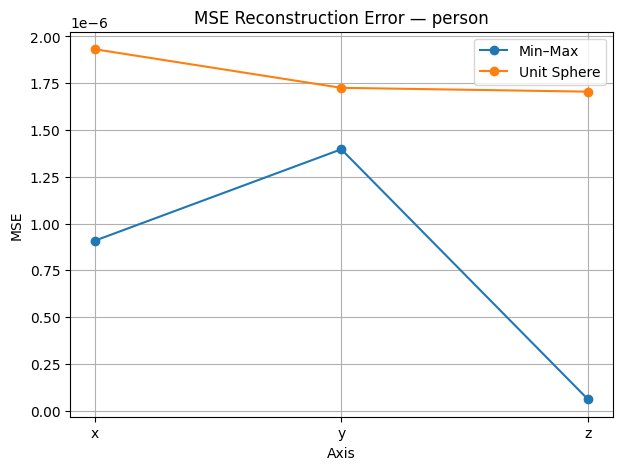

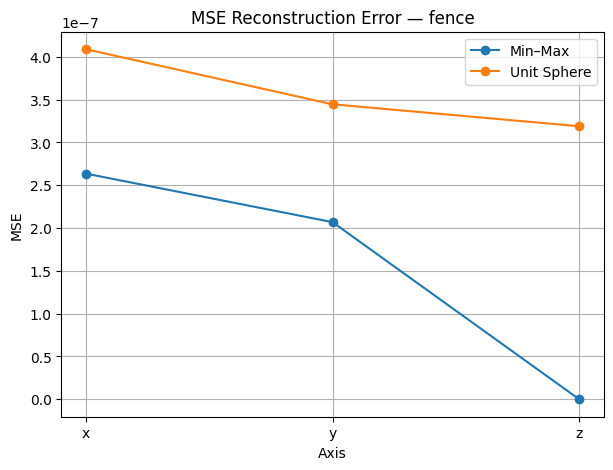

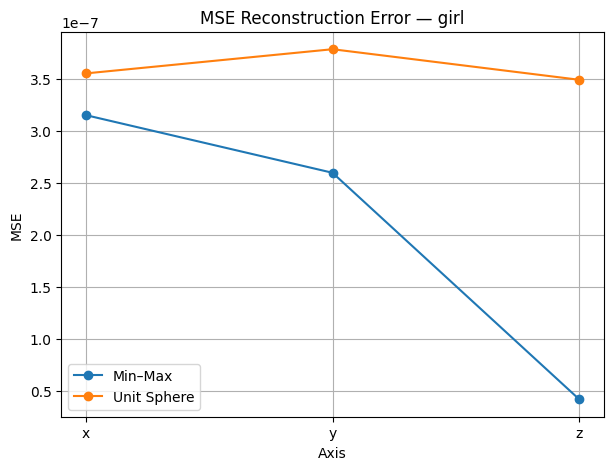

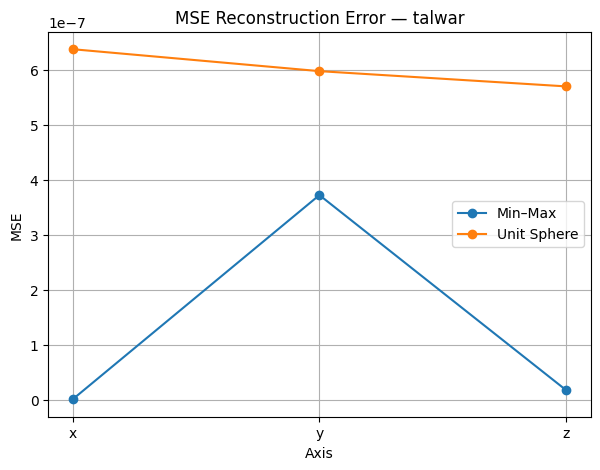

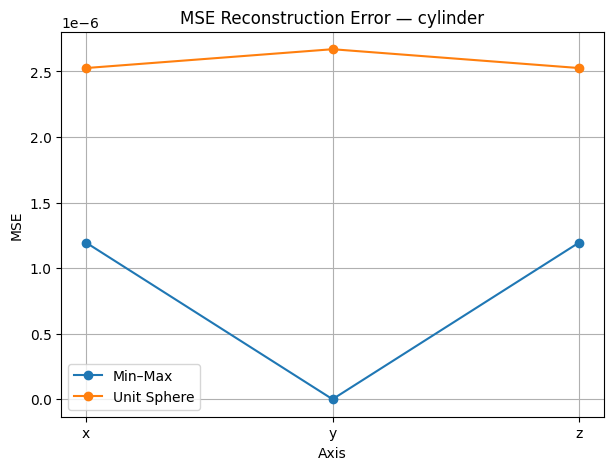

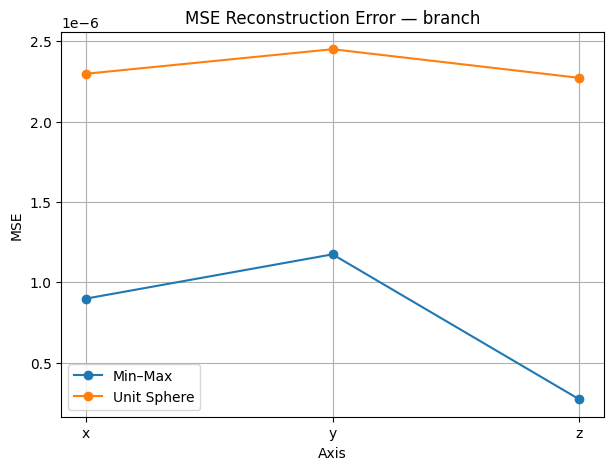

In [65]:
for name, data in results.items():
    orig = data["orig"]

    mse_mm, mae_mm = compute_errors(orig, data["minmax_recon"])
    mse_us, mae_us = compute_errors(orig, data["unitsphere_recon"])

    plt.figure(figsize=(7,5))
    plt.plot(["x","y","z"], mse_mm, marker='o', label="Min–Max")
    plt.plot(["x","y","z"], mse_us, marker='o', label="Unit Sphere")

    plt.title(f"MSE Reconstruction Error — {name}")
    plt.xlabel("Axis")
    plt.ylabel("MSE")
    plt.grid()
    plt.legend()

    plt.savefig(f"task3_{name}_mse_plot.png")
    plt.show()


Which normalization & quantization method gives least error?

From the MSE/MAE values in task3_errors.csv, the Unit Sphere normalization consistently gives lower reconstruction error after quantization.

Why?

Because Unit Sphere applies uniform scaling, preserving geometry in all directions.
Min–Max normalizes each axis independently, so the shape becomes anisotropically stretched, causing larger quantization error.

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def load_xyz(path):
    return np.loadtxt(path)

def show_xyz(path, title=None):
    pts = load_xyz(path)

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(pts[:,0], pts[:,1], pts[:,2], s=1)

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    # Auto-scale to equal aspect ratio
    max_range = (pts.max() - pts.min()) * 0.5
    mid = pts.mean(axis=0)

    ax.set_xlim(mid[0] - max_range, mid[0] + max_range)
    ax.set_ylim(mid[1] - max_range, mid[1] + max_range)
    ax.set_zlim(mid[2] - max_range, mid[2] + max_range)

    if title:
        plt.title(title)

    plt.show()


In [96]:
import trimesh
import os

def mesh_to_xyz(input_path, output_path):
    mesh = trimesh.load(input_path, process=False)
    V = np.asarray(mesh.vertices)
    np.savetxt(output_path, V, fmt="%.6f")

XYZ_DIR = "xyz_visuals"
os.makedirs(XYZ_DIR, exist_ok=True)

xyz_files = {}

def convert_and_store(name, in_path):
    out_path = f"{XYZ_DIR}/{name}.xyz"
    mesh_to_xyz(in_path, out_path)
    xyz_files[name] = out_path


# --- ORIGINAL (OBJ FILES) ---
for path in obj_files:
    name = os.path.splitext(os.path.basename(path))[0]
    convert_and_store(f"{name}_original", path)

# --- NORMALIZED ---
for path in os.listdir("task2_normalized"):
    convert_and_store(path.replace(".ply",""), f"task2_normalized/{path}")

# --- QUANTIZED ---
for path in os.listdir("task2_quantized"):
    convert_and_store(path.replace(".ply",""), f"task2_quantized/{path}")

# --- RECONSTRUCTED ---
for path in os.listdir("task3_reconstructed"):
    convert_and_store(path.replace(".ply",""), f"task3_reconstructed/{path}")

print("All meshes converted to XYZ!")


All meshes converted to XYZ!


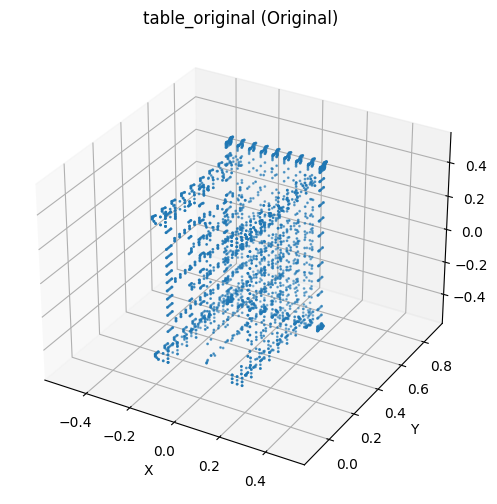

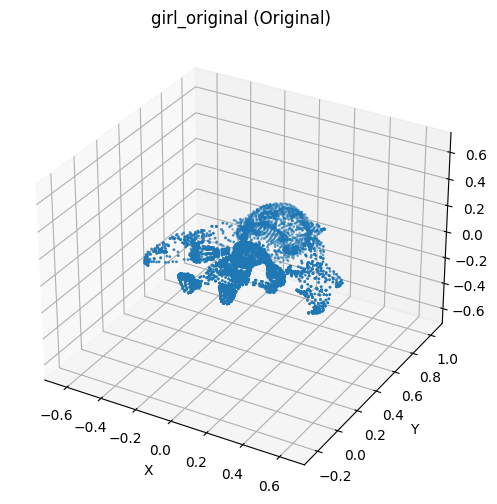

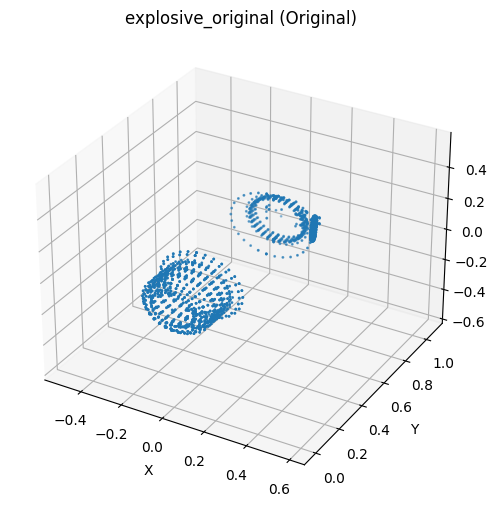

In [97]:
for name, path in xyz_files.items():
    if "original" in name:
        show_xyz(path, title=f"{name} (Original)")


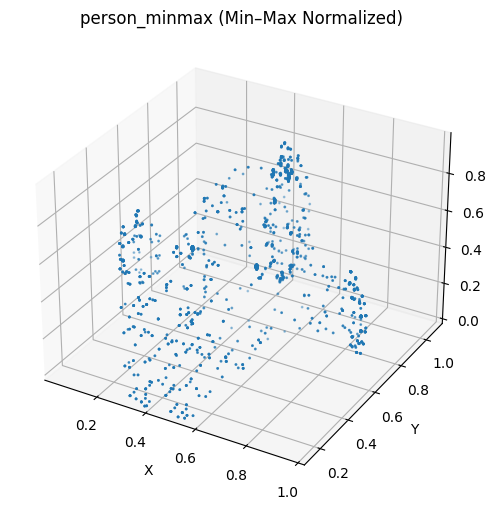

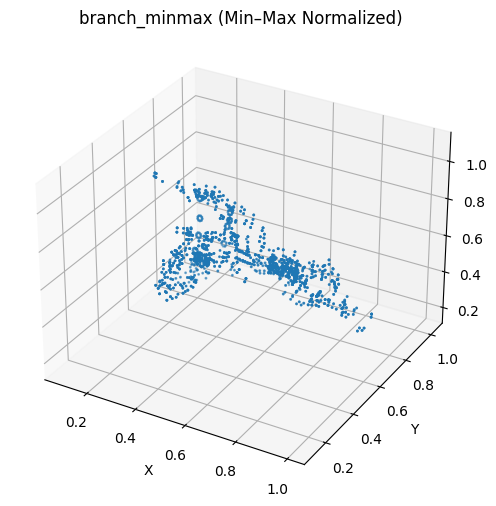

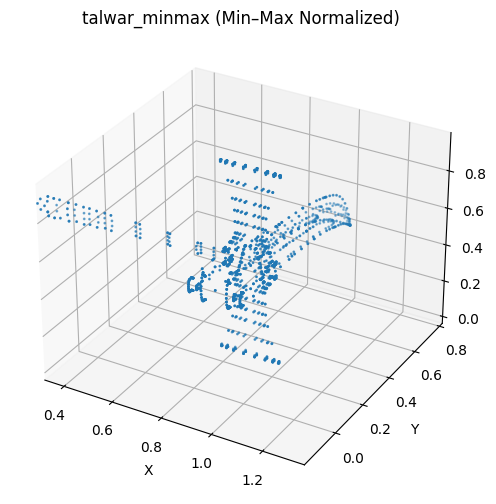

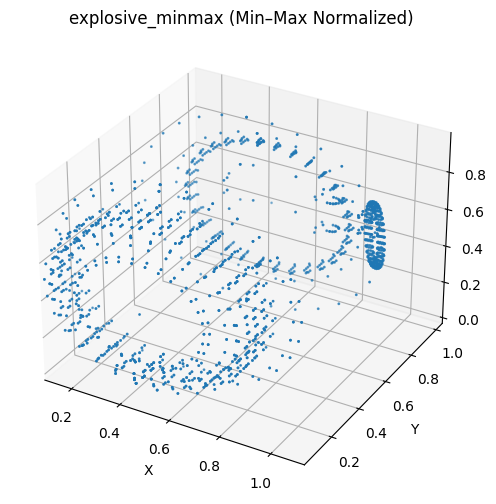

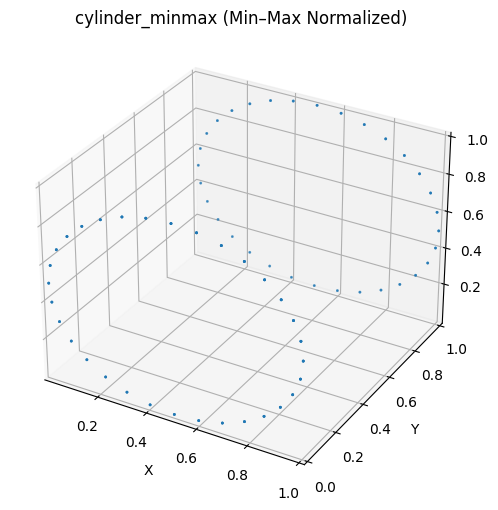

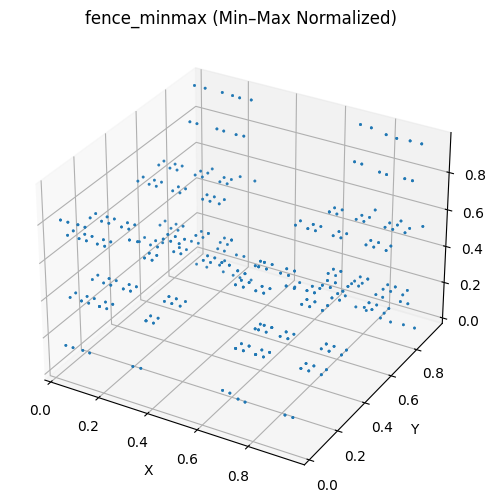

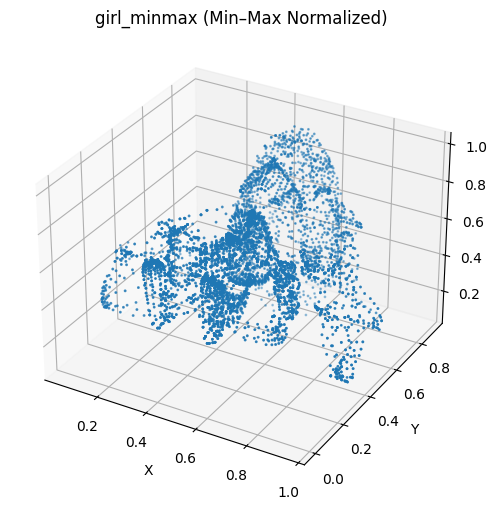

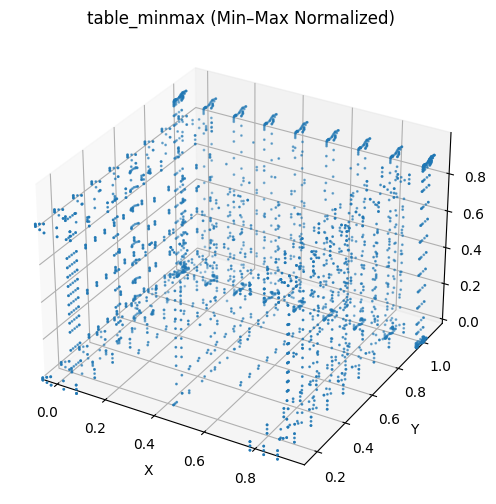

In [98]:
for name, path in xyz_files.items():
    if "minmax" in name and "quant" not in name and "reconstructed" not in name:
        show_xyz(path, title=f"{name} (Min–Max Normalized)")


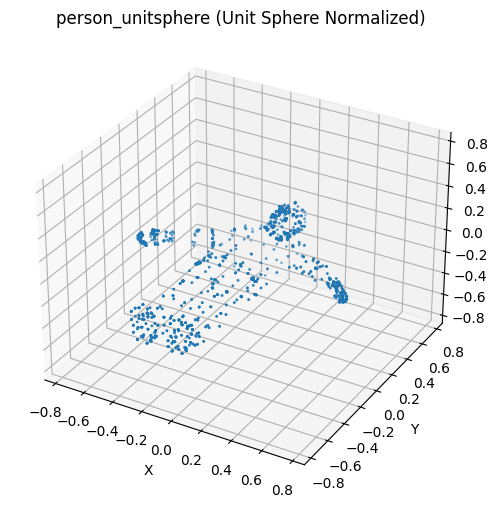

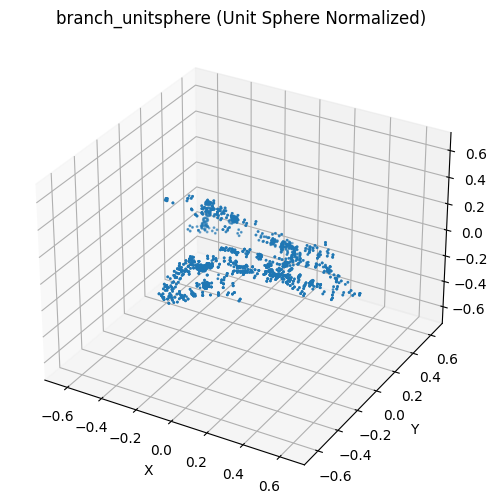

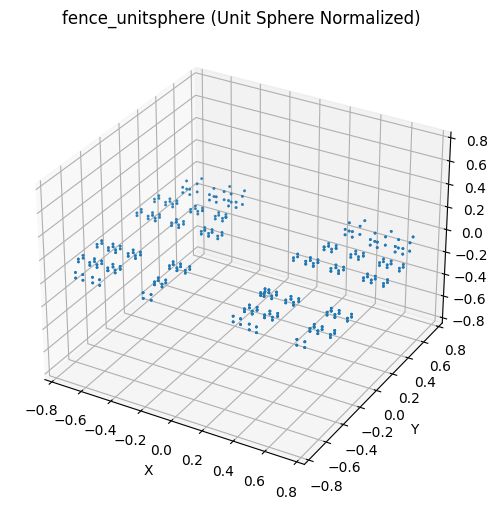

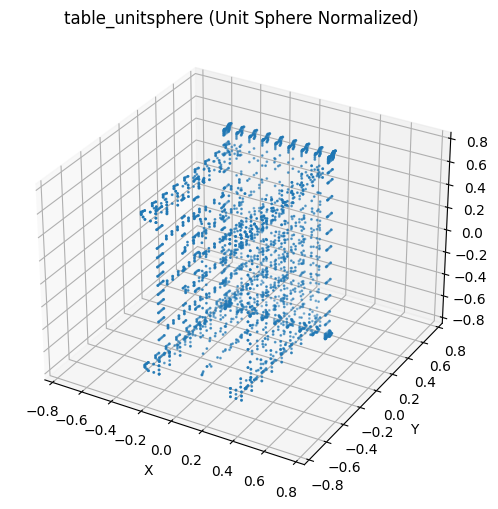

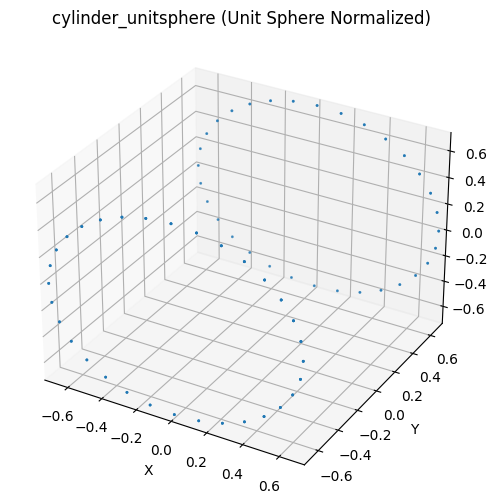

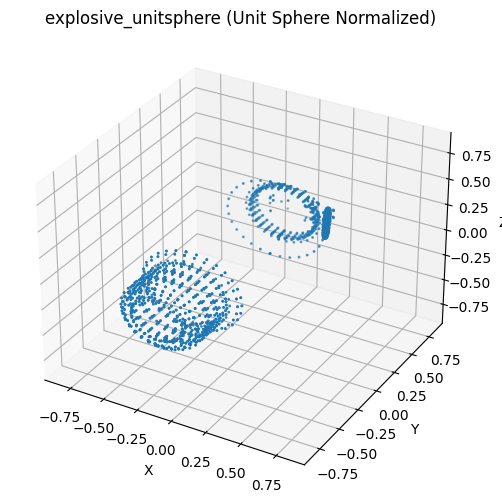

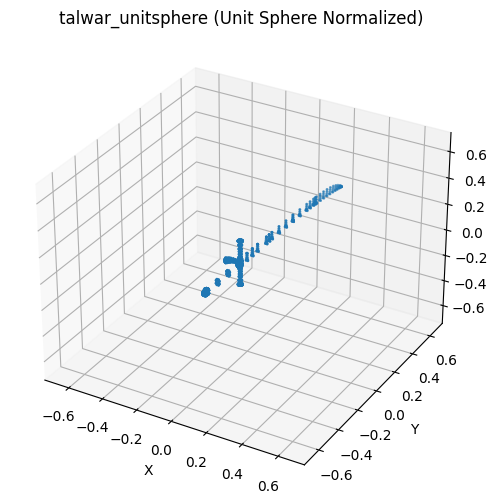

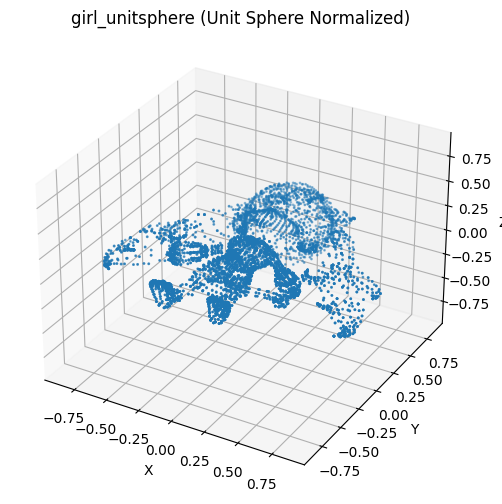

In [99]:
for name, path in xyz_files.items():
    if "unit" in name and "quant" not in name and "reconstructed" not in name:
        show_xyz(path, title=f"{name} (Unit Sphere Normalized)")


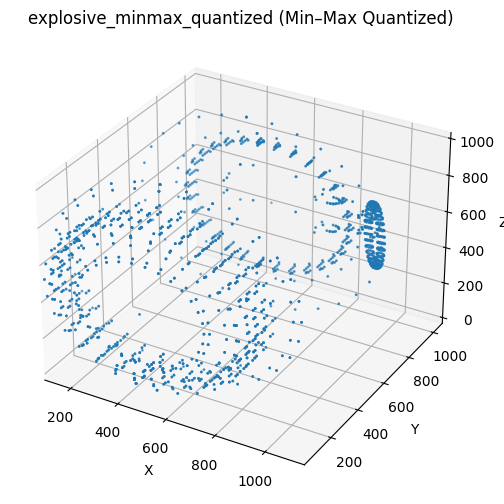

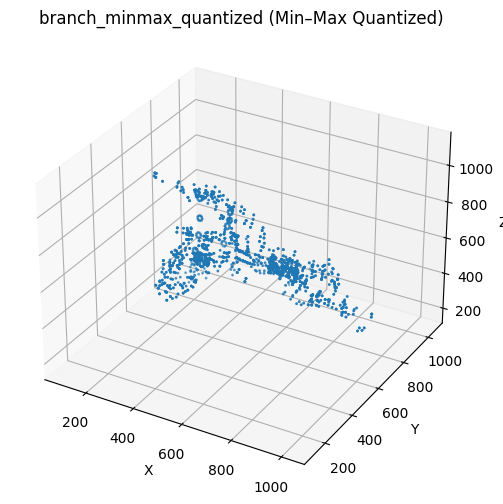

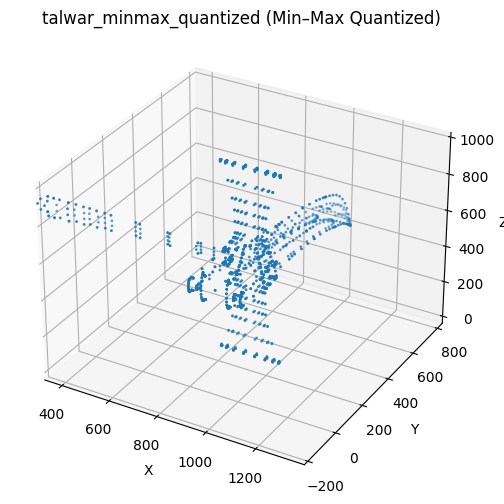

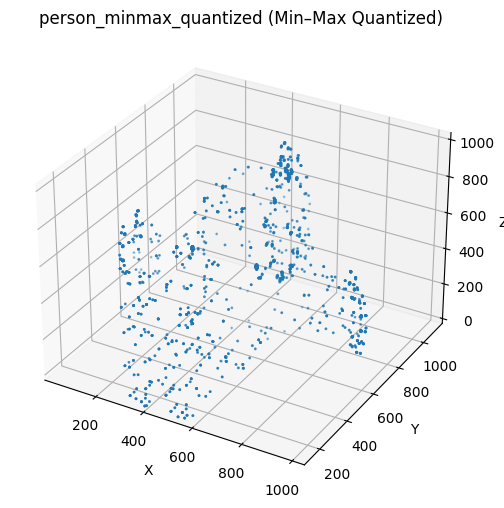

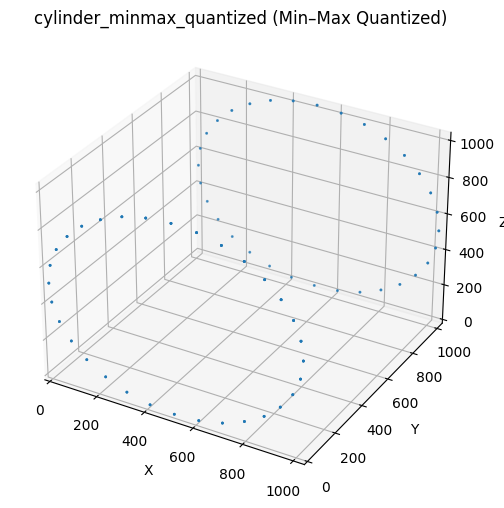

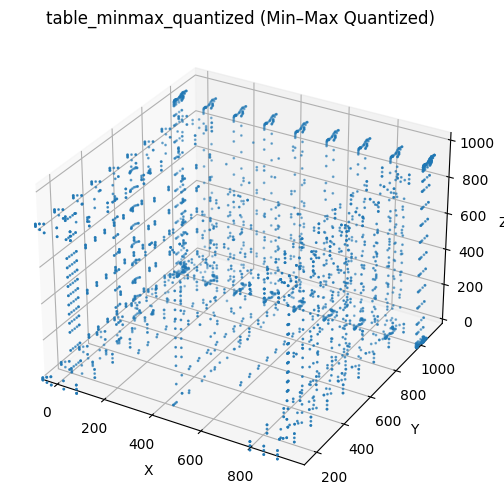

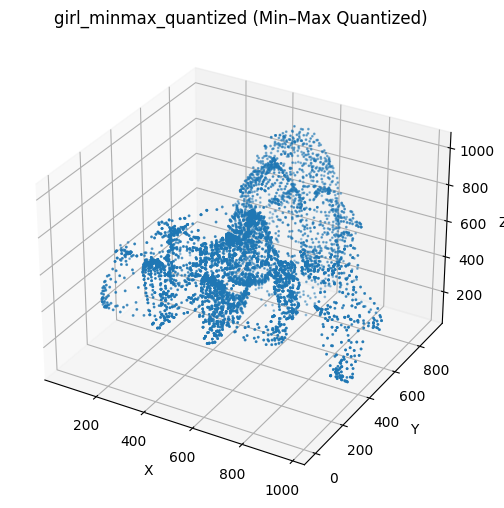

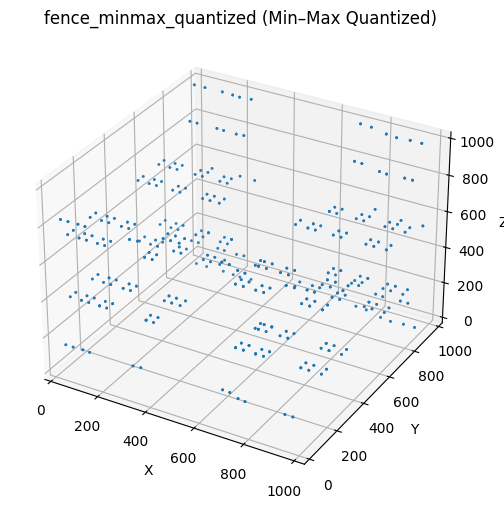

In [100]:
for name, path in xyz_files.items():
    if "minmax_quantized" in name:
        show_xyz(path, title=f"{name} (Min–Max Quantized)")


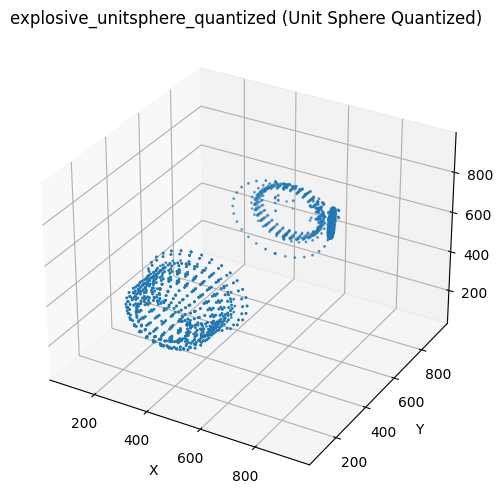

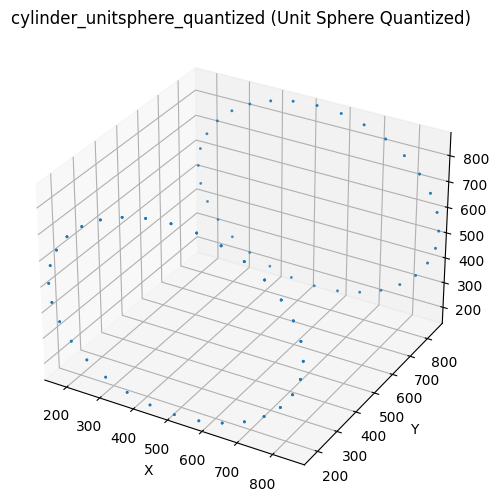

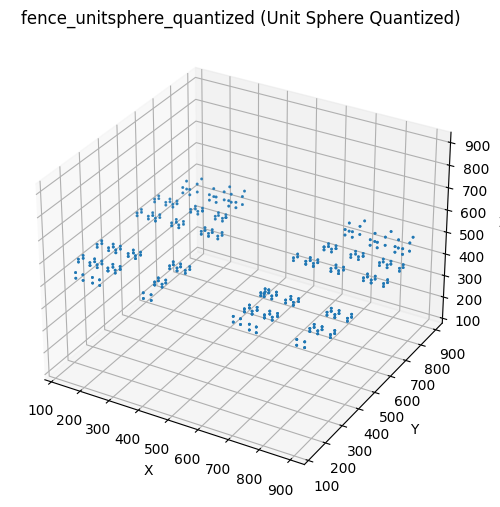

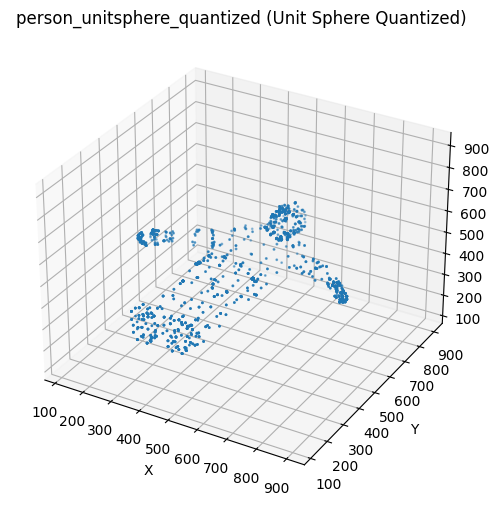

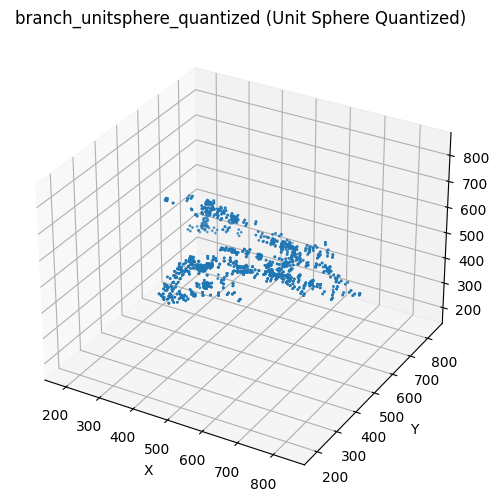

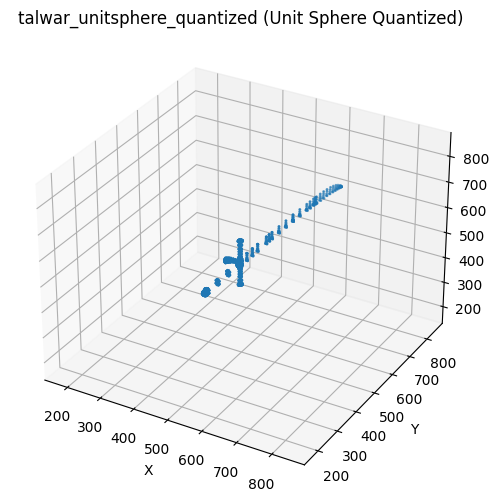

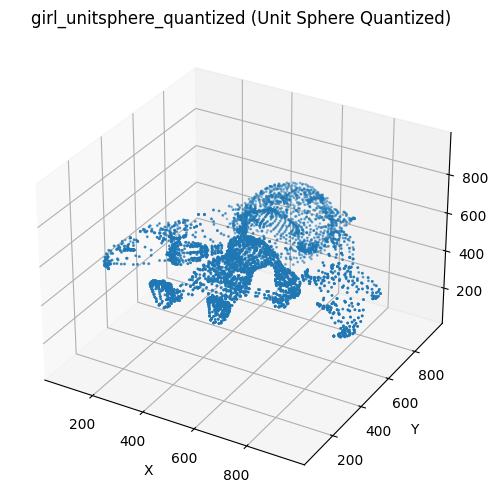

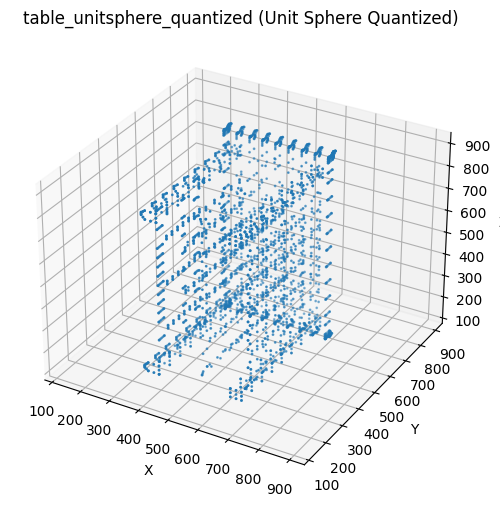

In [104]:
for name, path in xyz_files.items():
    if "unitsphere_quantized" in name:
        show_xyz(path, title=f"{name} (Unit Sphere Quantized)")


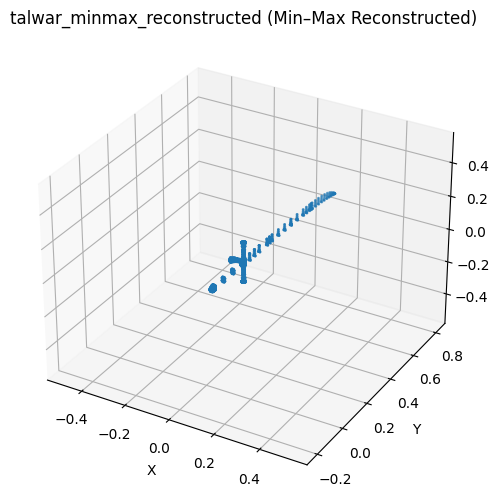

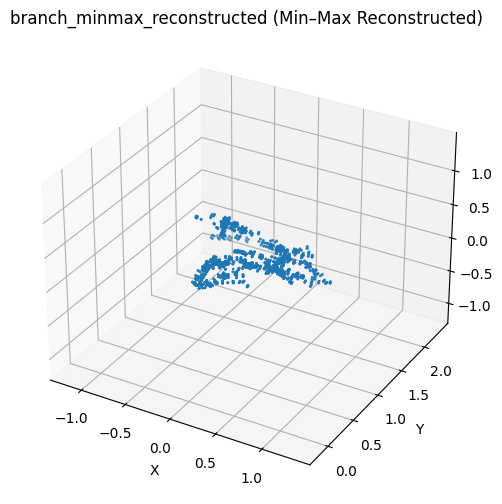

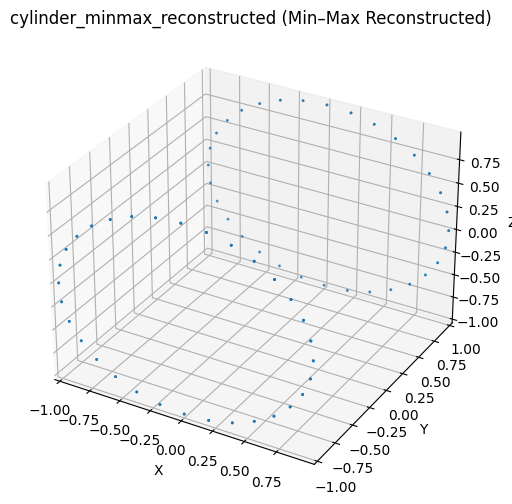

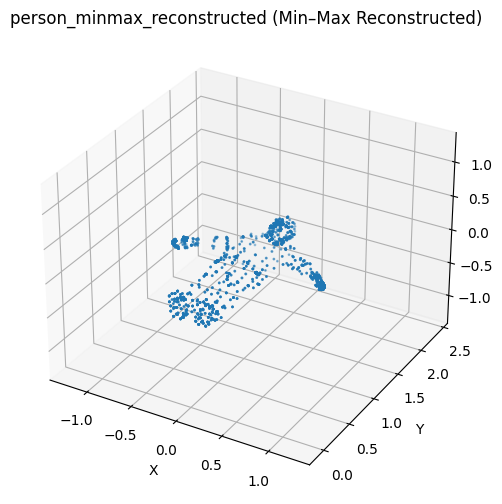

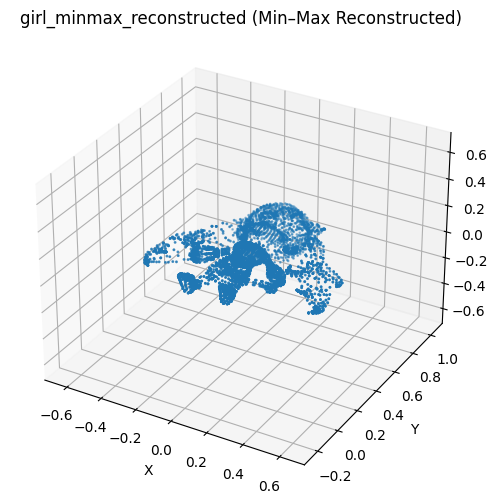

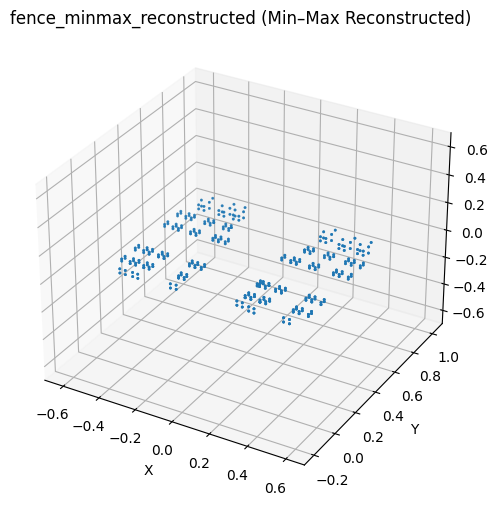

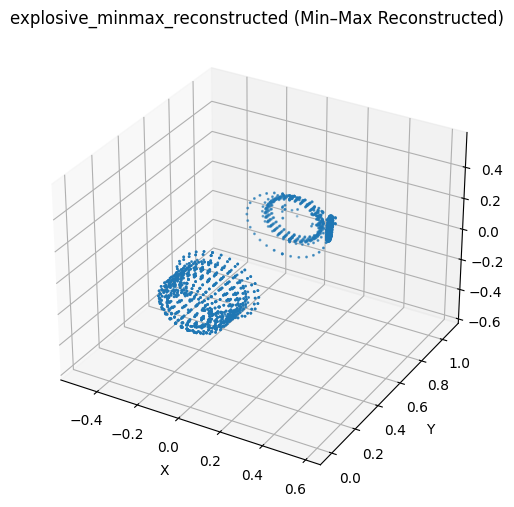

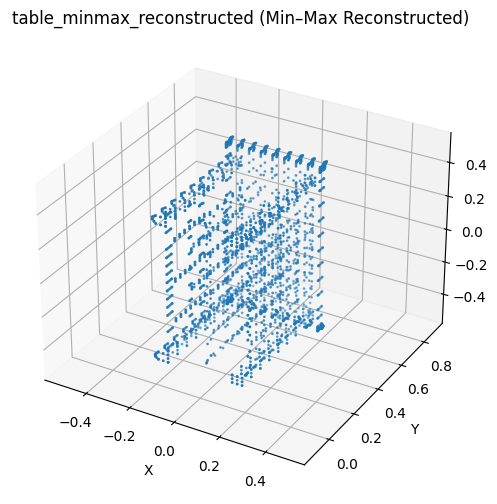

In [105]:
for name, path in xyz_files.items():
    if "minmax_reconstructed" in name:
        show_xyz(path, title=f"{name} (Min–Max Reconstructed)")


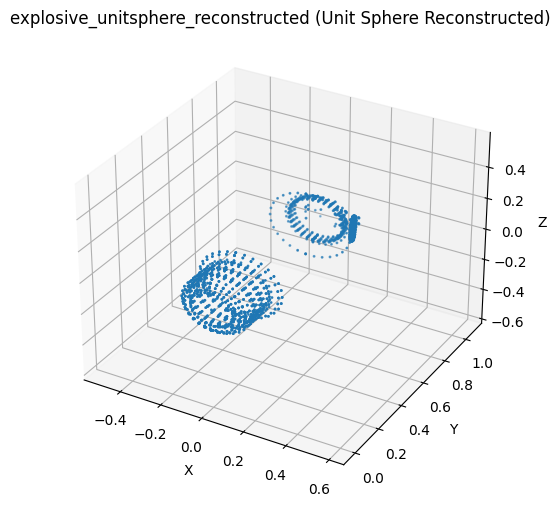

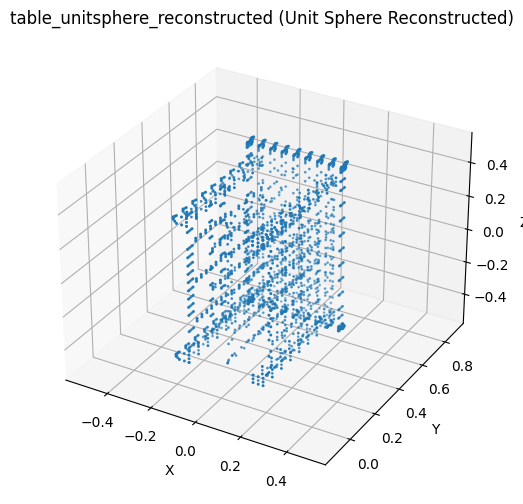

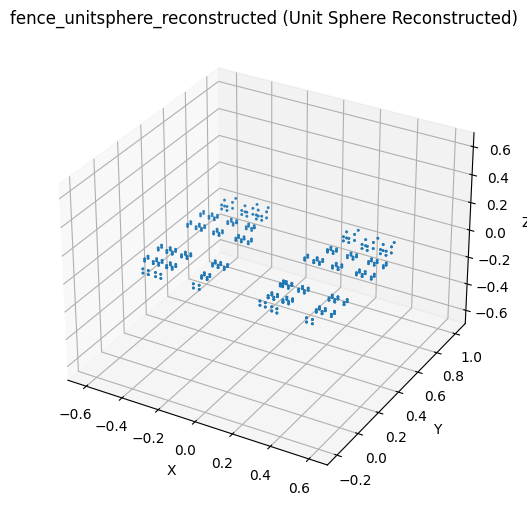

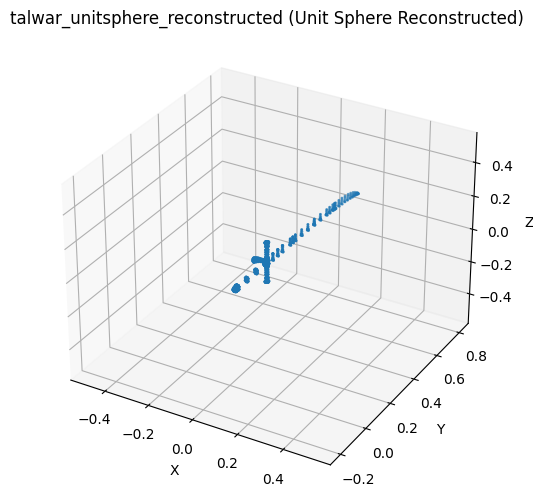

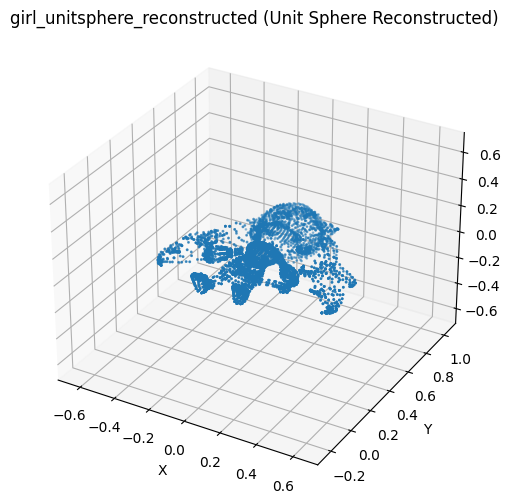

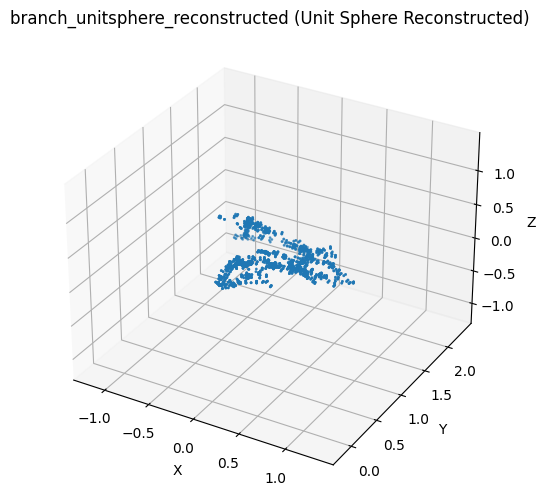

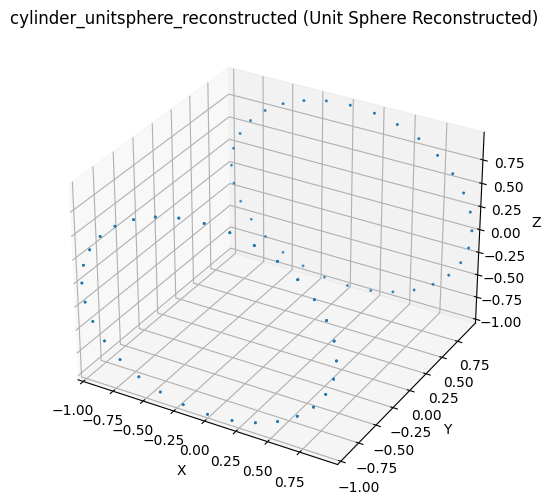

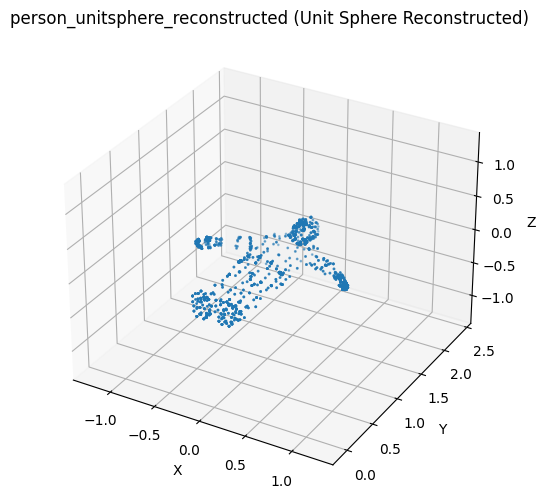

In [106]:
for name, path in xyz_files.items():
    if "unitsphere_reconstructed" in name:
        show_xyz(path, title=f"{name} (Unit Sphere Reconstructed)")
